In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class EM:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape
        self.weights = np.ones(self.n_clusters) / self.n_clusters
        self.means = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        self.covariances = np.array([np.eye(n_features) for _ in range(self.n_clusters)])

        for _ in range(self.max_iter):
            # Expectation step
            r_ic = np.zeros((n_samples, self.n_clusters))
            for i in range(self.n_clusters):
                r_ic[:, i] = self.weights[i] * multivariate_normal.pdf(X, mean=self.means[i], cov=self.covariances[i])
            r_ic = r_ic / r_ic.sum(axis=1)[:, np.newaxis]

            # Maximization step
            N_c = r_ic.sum(axis=0)
            self.weights = N_c / n_samples
            self.means = np.dot(r_ic.T, X) / N_c[:, np.newaxis]
            for i in range(self.n_clusters):
                self.covariances[i] = np.dot((X - self.means[i]).T, (X - self.means[i]) * r_ic[:, i][:, np.newaxis]) / N_c[i]

        self.labels = np.argmax(r_ic, axis=1)

    def predict(self, X):
        r_ic = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            r_ic[:, i] = self.weights[i] * multivariate_normal.pdf(X, mean=self.means[i], cov=self.covariances[i])
        return np.argmax(r_ic, axis=1)

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url)

X = data.iloc[:, :4].values

In [4]:
em = EM(n_clusters=3)
em.fit(X)

In [5]:
labels = em.labels

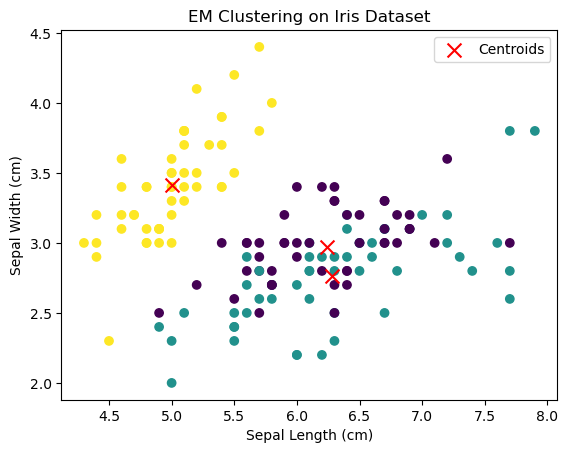

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(em.means[:, 0], em.means[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('EM Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()